<font size=4 color='blue'>

# <center> Clase 4, octubre 13 del 2021 </center>

<font size=4 color='blue'>
    
## Problema a resolver


<img src="./images/Problema.jpg" width=420 height=420 align = "center" >

<font size=6 color='blue'>
Mortalidad por diabetes

<img src="./images/Diabetes.png" width=420 height=420 align = "center" >

<font size=5 color='blue'>
    
Información sobre el problema a resolver

<font size=4>

Evolución de la enfermedad de pacientes con Diabetes Mellitus despues de un año.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo:

     Colesterol Total 
     Baja densidad de liporoteinas
     Alta densidad de lipoproteinas
     Triglicéridos
     Concentración de Lamorigina
     Glucosa

<font size=5 color='blue'>
    
Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Los datos se encuentran el el archivo diabetes.csv. Estos se cargan en el objeto df del tipo DataFrame

df = pd.read_csv('diabetes.csv', sep ='\t')

# el objeto df contiene los 10 rasgos relevantes de los pacientes diabéticos,
# así como el progreso (Y) de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4>
Las abreviaciones tienen el siguiente significado:
    
    AGE = Age
    SEX = Sex
    BMI = Body Mass Index (BMI)
     BP = Mean Arterial Pressure (MAP)
     S1 = Total Cholesterol (TC)
     S2 = Low Density lipoproteins (LDL)
     S3 = High Density lipoproteins (HDL)
     S4 = Triglyceride (TG, TCH)
     S5 = Serum Concentration of Lamorigine (LTG)
     S6 = Glucose (GLU)
      Y = Quantitative Measure of Diabetes Mellitus Disease Progression (QMDMDP) one year after the baseline.

In [4]:
# El método "describe()" del DataFrame df genera una tabla con informacion estadistica
# de cada uno de los rasgos y del objetivo.

df.describe()



,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

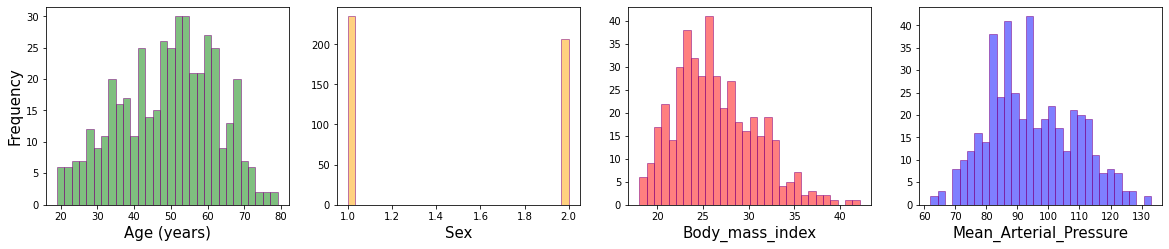

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

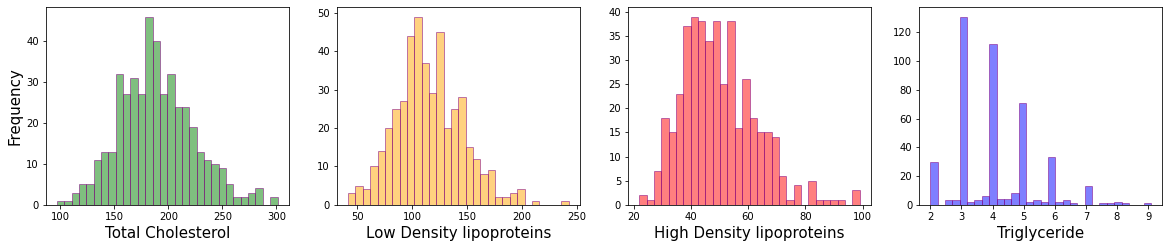

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

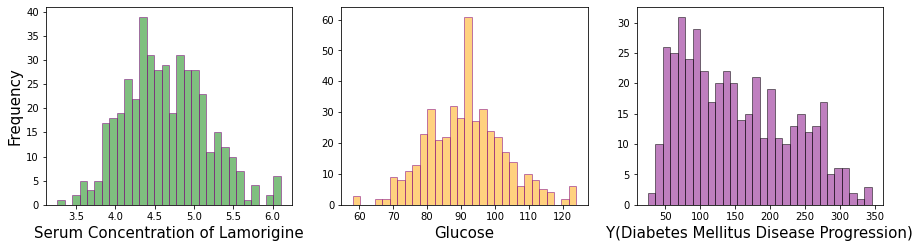

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=5 color='blue'>

# <center> Linear Regression Analysis </center>

<font size=5 color='blue'>

Regression analysis

<font size=4 color='black'>
    
In statistical modeling, $\textbf {regression analysis}$ is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').
    
More: [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)

<font size=5 color='blue'>
    
Implementacion de un sistema de aprendizaje, empleando un análisis de regresion lineal

<font size=4 >
Los pasos principales para construir el sistema son:

1. Definir un modelo proponiendo un algoritmo que relacione las variables X y Y.
2. Inicializar las variables asociadas al modelo, $w, b$ (pesos y biases).
3. Realizar lo siguiente en cada época:
     - Calcular el costo ($J$).
     - Calcular el gradiente del costo respecto a las variables asociadas al modelo.
     - Actualizar los pesos y los biases empleando el algoritmo propuesto para optimización. Por ejemplo, gradiente descendente 

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size=4 >
    
Si se tienen $m$ muestras.
    
Para una muestra $j\in m$, con sus valores de la variable $x$, $x^{(j)}$, se genera la variable $z^{(j)}$ mediante la siguiente relación lineal:

$$z^{(j)} = w^T x^{(j)} + b = \sum_{i \in j} w_{i} x_{i}^{(j)} + b $$

$z^{(j)}$ es la combinacion lineal entre los pesos, $w_{i}$ y los valores $x^{(j)}$ + el bias b. Posteriormente esta sumatoria es transformada (activada) con una función, para generar la variable de salida $a^{(j)}$. 
    
Dado que inicialmente nos interesa realizar un aprendizaje con con regresión lineal, la función de transformación es la identidad $f(z)=z$.

$$F(x^{(j)}) = a^{(j)} = f(z^{(j)})=z^{(j)}$$ 

Para realizar el aprendizaje, se genera una métrica definida por la función de perdida (*loss*), tambien llamada función de costo *cost*, $J$. Esta función se obtienes realizando el promedio, sobre todas las $m$ muestras, de la diferencia al cuadrado entre el valor ($y^{(j)}$) de la muestra $j$ y el valor de la función $F(x^{(j)})$.  

$$ J = \frac{1}{m} \sum_{j=1}^m (y^{(j)} -F(x^{(j)}))^2$$




<font size=4>

Para quitar cuarquier posible correlación entre las muestras, estas se reordenan al azar.

In [8]:
df = df.sample(frac=1)

In [9]:
print(df.shape)

(442, 11)


In [10]:
print(len(df.values[:,:]))

442


<font size=5 color='blue'>
División de las muestras para aprender y para hacer predicciones

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias (predicciones) con el sistema de aprendizaje.

In [11]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [12]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=5 color='blue'>  
Dada una distribución, podemos calcular su valor promedio $\mu$ y su varianza $\sigma$

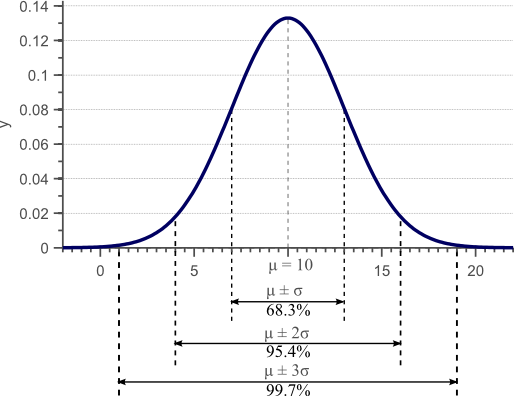


<font size=4>

Para trabajar con los modelos de aprendizaje,es adecuado que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se emplearán en el entrenamiento, tanto los rasgos (X) y las variables objetivo (Y):

$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [13]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()
df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
302,0.253900,-0.923573,0.703915,0.688202,0.642634,0.577997,-0.059753,0.176622,0.648198,0.577544,0.575072
376,-0.055535,-0.923573,1.432966,-0.128483,2.592908,2.812108,-0.516672,1.801738,0.961144,-0.038340,-0.418674
57,-0.597045,-0.923573,-1.346540,-1.065545,-1.967732,-2.274059,1.082547,-1.602535,-1.181358,-1.446075,-1.502761
29,1.414281,1.080025,-0.139050,1.313150,-0.947589,-2.090712,1.082547,-1.602535,1.239529,1.105444,1.672064
397,1.104846,-0.923573,-0.093484,-0.656842,-1.037601,-1.275839,-0.288212,-0.547364,0.750158,0.489560,0.575072


<font size=5 color='blue'> 
Nota importante: La normalización de las muestras de prueba se realiza con los valores de $\mu$ y $\sigma$ obtenidos con las muestras empleadas para el entrenamiento

In [14]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
419,-0.442328,-0.923573,-1.164278,-1.137626,-1.457660,-1.255467,0.244861,-0.832337,-1.557122,-0.126324,-1.438232
204,2.342585,1.080025,0.134344,0.592333,-0.617543,-0.168970,-0.973592,0.708058,0.036819,1.633345,1.594629
245,-0.597045,-0.923573,-0.754187,-0.633055,-1.247631,-1.282630,0.625627,-0.832337,-1.049803,-2.765827,-0.367051
174,0.331259,1.080025,0.202693,-0.921381,-2.117753,-2.063550,-0.821285,-0.832337,0.351673,0.137626,-0.031501
185,-1.602708,1.080025,-0.389661,0.159843,-0.437517,-0.549244,-1.354358,0.708058,1.404881,-0.390274,-0.676790


<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

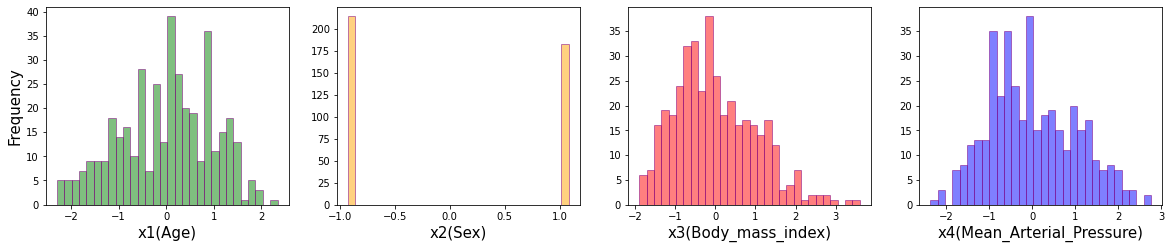

In [15]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

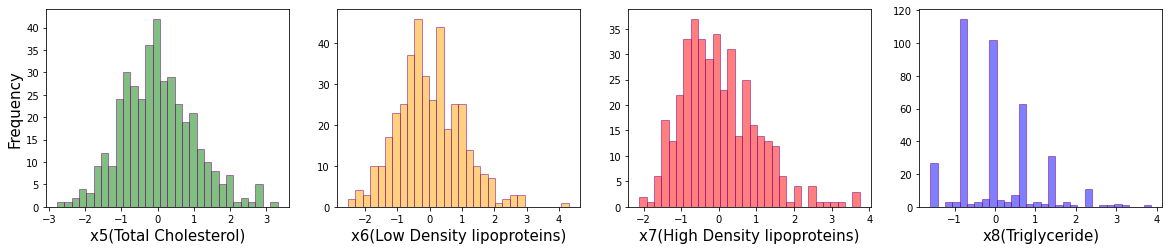

In [16]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(Total Cholesterol)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(Low Density lipoproteins)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(High Density lipoproteins)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(Triglyceride)', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

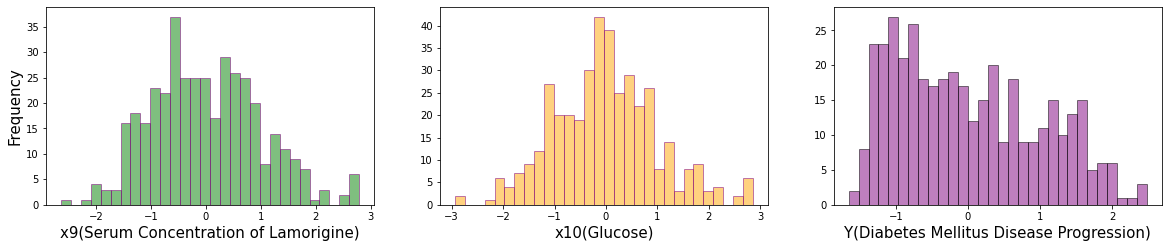

In [17]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(Serum Concentration of Lamorigine)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(Glucose)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [18]:
x_train = df_train_norm.values[:,:-1]
y_train = df_train_norm.values[:,-1:]
print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(397, 10)
(397, 1)


In [19]:
x_test = df_test_norm.values[:,:-1]
y_test = df_test_norm.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(45, 10)
(45, 1)


In [20]:
train_x = x_train.T
test_x = x_test.T

train_y = y_train
test_y =  y_test

In [21]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 397)
(397, 1)
(10, 45)
(45, 1)


In [22]:
train_x[:,1:3]

array([[-0.05553458, -0.59704545],
       [-0.92357251, -0.92357251],
       [ 1.43296608, -1.34654049],
       [-0.12848327, -1.0655447 ],
       [ 2.59290773, -1.96773189],
       [ 2.81210757, -2.2740587 ],
       [-0.51667222,  1.08254675],
       [ 1.80173849, -1.60253475],
       [ 0.96114362, -1.18135819],
       [-0.03834039, -1.44607547]])

 <font size=5 color='blue'>    
1. Se inicializan los parámetros de la función, $F(X)$ que define la relación entre X y Y. 

<font size=4>
Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándard de 1, los valores de los parámetros $w$ se inicializan con valores pequeños, mientras que el bias se inicializa con cero.

In [23]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [24]:
#Testing the function initialize_params (dim)

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.09891296]
 [ 0.00019015]
 [-0.07358957]
 [-0.06537766]
 [ 0.03112733]
 [ 0.02137216]
 [ 0.06742789]
 [-0.06436022]
 [-0.0939287 ]
 [ 0.02635889]]
b = 0


 <font size=5 color='blue'> 
    
2. Cálculo de la función de costo y sus derivadas parciales respecto a sus parámetros

<font size=4>
Una vez inicializados los pesos y el bias, se calcula la función de costo, y sus derivadas parciales respecto a cada uno de los pesos $w_{i}$ y el bias $b$. Estas derivadas se emplean para proponer nuevos valores tanto para los pesos como para el bias. 

La funcion *propagate( )* calcula la función de costo y su gradiente:

- Se tiene X $$ $$
- Se calcula $$A = (w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$ $$ $$
- Se calcula la función de costo: $$J = \frac{1}{m}\sum_{i=1}^m(y^{(i)} -F(x^{(i)}))^2$$


Las derivadas de la funcion de costo respecto a los pesos $ w_k$ y el bias $ b$ son:


$$ \frac{\partial J}{\partial w_k} = \frac{1}{m}X(A-Y)^T$$ $$ $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (F(x^{(i)})-y^{(i)}))$$

In [25]:
#Función para transformar los efectos no lineales. En el presente caso se considera un modelo completamente
#lineal. Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [26]:
def propagate(w, b, X, Y,X_val,Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = identity(np.dot(w.T, X)+b)
    A_val = identity(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    
    db = (1/m)*np.sum(A-Y)
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val = np.squeeze(cost_val)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

<font size=5 color='blue'> 
3. Actualizacion de los pesos y el bias

<font size=5 color='black'> 
Para monitorear el aprendizaje, las muestras para el aprendizaje se dividen en dos grupos:

<font size=4 color='black'>
El 90% de ellas se emplean para realizar el aprendizaje y el 10% restante para evaluar, "validar", la calidad del aprendizaje.

<font size=4>
    
La función *optimize(  )*  actualiza los pesos $w$ y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Los pesos $ w_{k} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{k} := w_{k} - \alpha \frac{\partial J}{\partial w_{k}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro que define la relación de aprendizaje.

In [27]:
def optimize(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        
        grads, cost, cost_val = propagate(w, b, X, Y,X_val,Y_val)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after epoch %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

<font size=5 color='blue'>
4. Calculo de inferencias (predicciones)

<font size=4>
    
Una vez que se encuentran los valores de los pesos $w$ y del bias $b$ que minimizan la función de costo, la función, $F(X)$ que se genera con estos valores se emplea para inferir valores de Y asociados a las muestras de prueba, los cuales se comparan con los valores Y conocidos de estas muestras.

La función `predic()` calcula $F(X)=w ^ T X + b$ empleando los valores de $w$ y $b$ para los cuales el costo es mínimo.


In [28]:
def predict(w, b, X):
    
    w = w.reshape(X.shape[0], 1)
    
    A = identity(np.dot(w.T, X)+b)
    
    return A

<font size=4>
Para calcular la precision del modelo, a manera de ejemplo, se usa el error cuadático medio, MSE: $$ $$

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i}^{m_{test}} (y^{(i)}-a^{(i)})^2)*100$$ 

<font size=5 color='blue'>
$$ $$
5. Sistema de aprendizaje: se juntan los pasos 1, 2,  y 3

In [29]:
def model(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):

    
    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]
    
    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)
    
    # 1. inicializacion de parametros
    w, b = initialize_params(X_train.shape[0])

    # 2. y 3. Actualizacion de parametros
    parameters, grads, costs, costs_val = optimize(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # 4. Predicciones
    Y_prediction_val = predict(w, b, X_val)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs, "costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

In [30]:
print(train_x.shape[1])


397


In [31]:
epochs = 2000
learning_rate = 0.01
val_ratio = 0.1
d = model(train_x, train_y.T, val_ratio=val_ratio, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val after epoch 0: 1.090599 1.077378
Cost and Cost_val after epoch 100: 0.488289 0.585475
Cost and Cost_val after epoch 200: 0.468804 0.597705
Cost and Cost_val after epoch 300: 0.465408 0.605193
Cost and Cost_val after epoch 400: 0.464461 0.607753
Cost and Cost_val after epoch 500: 0.464003 0.608598
Cost and Cost_val after epoch 600: 0.463682 0.608974
Cost and Cost_val after epoch 700: 0.463418 0.609262
Cost and Cost_val after epoch 800: 0.463188 0.609557
Cost and Cost_val after epoch 900: 0.462984 0.609871
Cost and Cost_val after epoch 1000: 0.462800 0.610195
Cost and Cost_val after epoch 1100: 0.462634 0.610520
Cost and Cost_val after epoch 1200: 0.462482 0.610838
Cost and Cost_val after epoch 1300: 0.462343 0.611145
Cost and Cost_val after epoch 1400: 0.462214 0.611440
Cost and Cost_val after epoch 1500: 0.462095 0.611720
Cost and Cost_val after epoch 1600: 0.461984 0.611985
Cost and Cost_val after epoch 1700: 0.461880 0.6

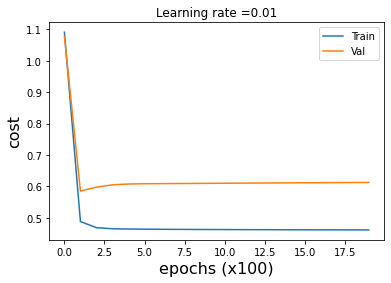

In [32]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs)
plt.plot(costs_val)
plt.ylabel('cost', size=16)
plt.xlabel('epochs (x100)', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

learning rate is:  0.01
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 53.82945310399445 %
test accuracy: 38.623306602095866 %

-------------------------------------------------------

learning rate is:  0.005
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 53.655063719579736 %
test accuracy: 38.8410080993805 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 52.83925693434236 %
test accuracy: 40.16967941588905 %

-------------------------------------------------------



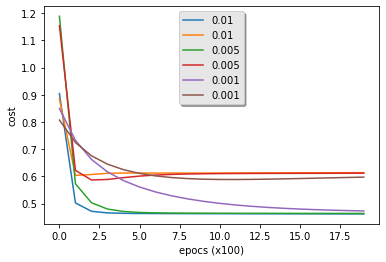

In [33]:
learning_rates = [0.01, 0.005, 0.001]
val_ratio = 0.1
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model(train_x, train_y.T, val_ratio=val_ratio, epochs = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('epocs (x100)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=6 color='blue'>
$$ $$
<center> Non-Linear Regression Analysis </center>

<font size=4>
    
Para nuestro nuevo sistema de aprendizaje, la función $F(X)$ ya no varía linealmente con X. La relación (2) de las siguientes ecuaciones ya no es válida:
    
$$z^{(j)} = w^T x^{(j)} + b = \sum_{i \in j} w_{i} x_{i}^{(j)} + b $$
    
$$F(x^{(j)}) = a^{(j)} = f(z^{(j)})=z^{(j)}$$ 


Para tomar en cuenta la no linealidad, la función $f(z)=z$ se cambia por una función ligeramente no lineal alrededor de cero. Esto se logra empleando en su lugar una función del tipo sigmoid, por ejemplo $f(z)=tanh(z)$. Con este cambio, la ecuación (2) se transforma entonces en: $$ $$
$$F(x^{(j)}) = a^{(j)} = f(z^{(j)}) = tanh(z^{(j)})$$     

In [34]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

<Figure size 936x576 with 0 Axes>

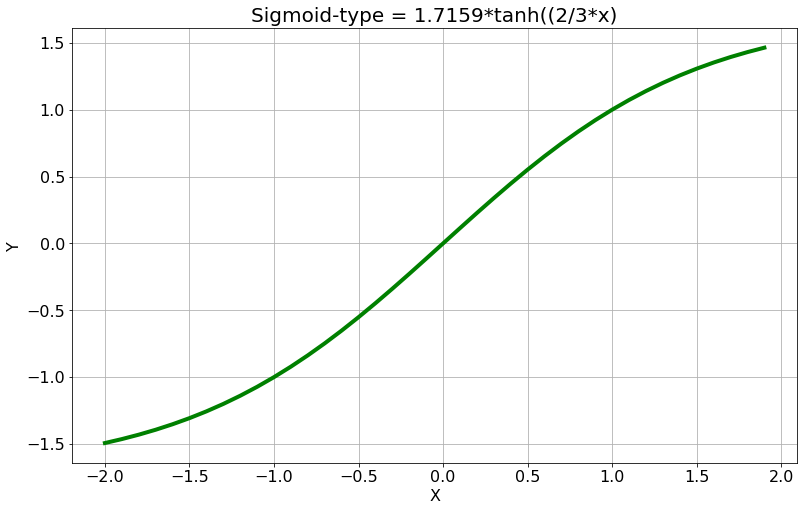

In [35]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.1)
y_ = 1.7159*tanh((2/3*x_))

#Samples and function F are plotted
plt.figure(figsize=(13,8))
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x_, y_, color='green', lw=4)

plt.show()

<font size=5 color='blue'>
Sistema de aprendizaje que relaciona las variables X y Y

<font size= 4>
Se tienen $m$ muestras. 
    
Para una muestra $j \in m$ $x^{(j)}$:

$$z^{(j)} = w^T x^{(j)} + b $$

$z^{(j)}$ es la combinacion lineal entre los pesos ($w$) y la muestra $x^{(j)}$ + el bias b. Posteriormente esta sumatoria es transformada, para generar el valor de salida $a^{(j)}$, mediante una función. En el presente caso la función es del tipo sigmoide (*tanh*), porque la relación es ligeramente no-lineal.

$$ a^{(j)} = tanh(z^{(j)})$$ 

La funcion de perdida (*loss*), tambien llamada costo *cost*, $\textbf {J}$, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(j)}$) y el valor que predice la funcion de activacion ($a^{(j)}$).  

$$ J = \frac{1}{m} \sum_{j=1}^m (a^{(j)} - y^{(j)})^2$$




<font size=4>

En lugar de emplear la función $f(z^{(j)})=tanh(z^{(j)})$ para la activación, empleamos la función $$ $$
     $$ f(z^{(j)}) = 1.7159*tanh(2*z^{(j)}/3) $$

[Activation-function](./Literatura/Efficient-backprop_Lecun_1998.pdf)$$ $$
Con ello, la varianza es cercana a 1, el valor de la función es ligeramente no lineal entre -1 y +1, y la derivada es máxima para $z^{(j)} = 1$ 
$$ $$
Con esto, la función de costo, $J$ está dada por:

$$ J = \dfrac{1}{m}\sum_{i=0}^{m}(1.7159*tanh(2*z^{(j)}/3)-y^{(j)})^2$$

<font size=5 color='blue'>   
1. Se inicializan las variables del sistema de aprendizaje que define la relación entre X y Y. 

In [36]:
def initialize_params_1(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [37]:
def atanh(x):
    return 1.7159*tanh(2*x/3)

In [38]:
def d_atanh(z):
    return 1.7159*(1-np.square(atanh(z)))*(2/3)

In [39]:
# Probando el código

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.09499882]
 [ 0.03053479]
 [ 0.07259292]
 [-0.03836042]
 [-0.09351837]
 [-0.04908901]
 [-0.03026122]
 [ 0.07236806]
 [-0.00341916]
 [-0.02910409]]
b = 0


In [40]:
def propagate_1(w, b, X, Y, X_val, Y_val):
    
    m = X.shape[1]
    m_val = X.shape[1]
    
    A = atanh(np.dot(w.T, X)+b)
    A_val = atanh(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dA = A-Y
    dZ = d_atanh(np.dot(w.T, X)+b)
    
    dw = (1/m)*np.dot(dA, (dZ*X).T).T    
    db = (1/m)*np.sum((A-Y)*(1-np.power(A, 2)), axis=1, keepdims=True)  
    
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

In [41]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate_1(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ -5.07757178]
 [-13.08893287]]
db = [[0.17455838]]
cost = 3.6063356189939464


<font size=4>
    
La función *optimize_1(  )*  actualiza los pesos $w$ y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Los pesos $ w_{i} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{i} := w_{i} - \alpha \frac{\partial J}{\partial w_{i}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro que define la relación de aprendizaje.

In [42]:
def optimize_1(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        grads, cost, cost_val = propagate_1(w, b, X, Y, X_val, Y_val)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after iteration %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

In [43]:
epochs = 100
params, grads, costs, costs_val = optimize_1(w, b, X, Y, x1_val, y1_val, epochs=epochs, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 5.57950249]
 [13.81103216]]
b = [[1.83448553]]
dw = [[ -5.08859121]
 [-13.12418521]]
db = [[0.18412642]]


<font size=4>
Una vez que se encuentran los valores de los pesos 𝑤 y del bias 𝑏 que minimizan la función de costo, la función, 𝐹(𝑋) que se genera con estos valores se emplea para inferir valores de Y asociados a las muestras de prueba, los cuales se comparan con los valores Y conocidos de estas muestras.
$$ $$

    
La función *predic()_1* calcula $𝐹(𝑋)$ empleando los valores de 𝑤 y 𝑏
para los cuales el costo es mínimo.



In [44]:
def predict_1(w, b, X):
    
    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #A = sigmoid(np.dot(w.T, X)+b)
    A = atanh(np.dot(w.T, X)+b)
    
    return A

In [45]:
w = np.array([[0.1124579],[0.23106775]])
b = 0.0
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict_1(w, b, X)))

predictions = [[ 0.43606665  0.38070532 -0.37888495]]


<font size=4>
Para estructurar el sistema de aprendizaje, se juntan todos las funciones implementadas en las partes anteriores, en el orden correcto.


In [46]:
def model_1(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]
    
    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)

    
    # initialize parameters
    w, b = initialize_params_1(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs, costs_val = optimize_1(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    print(w.shape)
    
    # Predict test/train set examples
    Y_prediction_val = predict_1(w, b, X_val)
    Y_prediction_train = predict_1(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs,"costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}
    
    return d

In [47]:
epochs = 1000
learning_rate = 0.005
val_ratio = 0.1

d = model_1(train_x, train_y.T, val_ratio=val_ratio, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val after iteration 0: 0.808440 0.092898
Cost and Cost_val after iteration 100: 0.551527 0.070257
Cost and Cost_val after iteration 200: 0.508823 0.067626
Cost and Cost_val after iteration 300: 0.491616 0.067145
Cost and Cost_val after iteration 400: 0.482804 0.066975
Cost and Cost_val after iteration 500: 0.477624 0.066836
Cost and Cost_val after iteration 600: 0.474307 0.066713
Cost and Cost_val after iteration 700: 0.472064 0.066615
Cost and Cost_val after iteration 800: 0.470489 0.066548
Cost and Cost_val after iteration 900: 0.469358 0.066510
(10, 1)
train accuracy: 53.14583206819532 %
test accuracy: 40.64968425231332 %


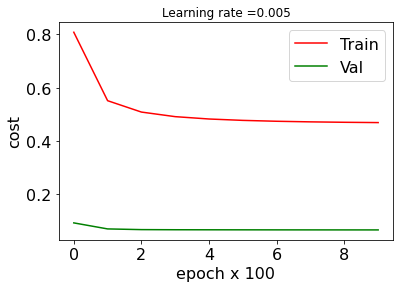

In [48]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs, color='red')
plt.plot(costs_val, color='green')
plt.ylabel('cost', size=16)
plt.xlabel('epoch x 100', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

learning rate is:  0.005
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 53.08504982840134 %
test accuracy: 40.60291288748663 %

-------------------------------------------------------

learning rate is:  0.003
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 52.45625872088327 %
test accuracy: 39.921316891249305 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 48.3028917583875 %
test accuracy: 40.502085300650336 %

-------------------------------------------------------



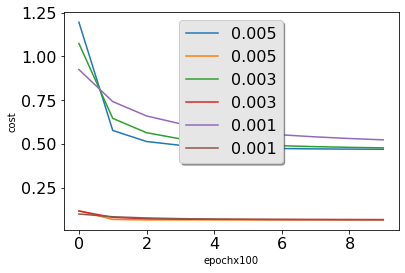

In [49]:
learning_rates = [0.005, 0.003, 0.001]
val_ratio = 0.1
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model_1(train_x, train_y.T, val_ratio=val_ratio, epochs = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('epochx100')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=6 color='blue'>

<center> Artificial Neural Networks </center>




<font size=4>

Inspirandose en modelos que intentan describir las conecciones entre las neuronas en nuestro cerebro, se propusieron (y se siguen proponiendo) modelos de redes neuronales para generar sistemas de aprendizaje. Se les conoce con el nombre de redes neuronales artificiales, o simplemente como redes neuronales.

<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Full Feed-forward (FFF)".

<font size=4>

<p>En nuestro primer modelo, la red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, a esta capa interna se le da el nombre de capa oculta). </p>
<p>El objetivo del modelo es encontrar una función que describa la evolución de la Diabetes Mellitus en una año, a partir de su linea base, con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y las seis mediciones de suero sanguíneo descritas al inicio: el colesterol total, la densidad baja de lipoproteinas, la densidad alta de lipoproteinas, los trigliceridos, la concentración de lamorigina y la glucosa</p>
<p>Esta función se genera mediante una red de neuronas artificiales. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=5 color='blue'>

Adecuando lo datos de alimentación al sistema de aprendizaje

<font size=4>

Antes de inciar el desarrollo del sistema, transformamos los datos de entrada para que sean compatibles con el modelo que desarrollaremos. El fomato de entrada de las variables X y Y, tanto para el entrenamiento como para la prueba es un poco diferente al empleado en los sistemas de aprendizaje anteriores.

In [50]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 397)
(397, 1)
(10, 45)
(45, 1)


In [51]:
train_y = train_y.T
test_y = test_y.T

In [52]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 397)
(1, 397)
(10, 45)
(1, 45)


<font size=4>
    
1.1 Definición de la arquitectura de la red neuronal.

Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matematico de la neurona.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, la evolución de la diabetes en un año. En el presente caso el número de rasgos es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes en un año.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el que de los mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [53]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] 
    
    n_h = n_h
    
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [54]:
n_h = 4
n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)

In [55]:
print(n_x, n_h, n_y)

10 4 1


<font size=5 color='blue'>
Network Visualization     
 
<font size=4 color='black'> 
    
We will use NetworkX, which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
    
[NetworkX](https://networkx.github.io/)

In [56]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


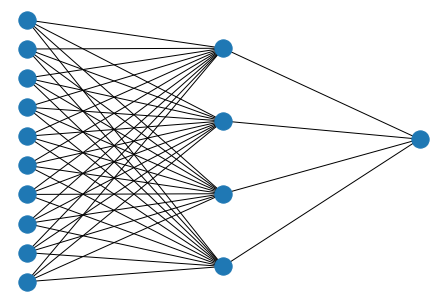

In [57]:
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
 1. Inicializacion de los pesos y el bias.

<font size=4>

La funcion initialize_parameters() inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el numero de nodos en la capa intera y $n_x$ es el numero de nodos en la capa de entrada, es decir, es el numero de variables independientes (rasgos).

Para cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber un $W$ y un $b$.

Generalizando:

$W_i$ y $b_i$ son los parametros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas, entonces las dimensiones de $W_{i}$ son $(n_{i+1}, n_i)$ y las de $b_i$ son $(n_{i+1}, 1)$.

In [58]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x))
        
    b1 = np.zeros((n_h, 1))
    
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h))
        
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [59]:
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.01280102, -0.09481475,  0.0099325 , -0.01293552, -0.01592644,
         -0.03393304, -0.05907027,  0.02385419, -0.04006907, -0.04663454],
        [ 0.02422677,  0.00582842, -0.07308401,  0.00271562, -0.06311203,
          0.05706703,  0.07079506, -0.00115263,  0.0693123 , -0.0840709 ],
        [ 0.00104922, -0.0869427 , -0.01437553, -0.08069382, -0.07456801,
          0.01934906, -0.0547976 , -0.07861086, -0.05593876, -0.03003474],
        [-0.0064425 , -0.05965135,  0.02808135, -0.00338603,  0.00104734,
         -0.02262147,  0.05872749,  0.01600084, -0.06754028,  0.04015047]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 9.29102160e-02,  1.67223404e-06,  7.79040128e-02,
         -3.16772695e-02]]),
 'b2': array([[0.]])}

<font size=5 color='blue'>

2. Conección entre las neuronas de capas contiguas.

<font size=4>

La funcion *propagate()* realiza la combinacion lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta sumatoria, es para considerar efectos no lineales.


___

Funciones de activación disponibles en la presente notebook: 

In [60]:
#Función para considerar los efectos no lineales.
#En el presente caso se considera un modelo completamente lineal.
#Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [61]:
def identity_derivative(z):
    return 1.0 * z * (1/z)

In [62]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [63]:
def tanh_derivative(z):
    return 1-np.power(tanh(z), 2)

In [64]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [65]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [66]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [67]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=5 color='blue'>

3. Cálculo de la función de costo durante la optimización de los parámetros que definen al modelo.

<font size=4>

Recordemos que la funcion de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. 

Para ello se buscan los parámetros que minimizen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m} \sum_{i=1}^{m}(y_i-a_i)^2$$

In [68]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores optimos de los parametros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega_k := \omega_k - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega_k}$$

$$ b_l := b_l - \alpha \dfrac{\partial J(\omega, b)}{\partial b_l}$$

Es por ello necesario calcular las derivadas del costo respecto a cada uno de los parametros que definen al sistema de aprendizaje. $\alpha$ es la relación de aprendizaje.

In [69]:
def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
4. Optimizacion de los pesos y los bias.

In [70]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
5. Las predicciones se realizan con los parametros óptimos encontrados en el entrenamiento.

In [71]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = identity(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [72]:
def nn_model(X, Y, val_ratio, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    train_ratio = int((1-val_ratio)*X.shape[1])
    X_val = X[:,train_ratio:]
    Y_val = Y[:,train_ratio:]

    X = X[:,:train_ratio]
    Y = Y[:,:train_ratio]
    
    print("Train",X.shape,Y.shape)
    print("val",X_val.shape,Y_val.shape)
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(X, Y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_val = []
    params = []
    

    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
        
        cost_val = validation(X_val, Y_val, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_val.append(cost_val)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_val))
            
    return parameters, costs, params, costs_val

<font size=5 color='blue'>

Entrenamiento:

<font size=5 color='black'> 
Para monitorear el aprendizaje, las muestras para el aprendizaje se dividen en dos grupos:

<font size=4 color='black'>
El (1.0 - val_ratio) (90% en el presente caso) de ellas se emplean para realizar el aprendizaje y el (val_ratio) (el 10% en el presente caso) restante para evaluar, "validar", la calidad del aprendizaje.

In [73]:
epochs = 2000
learning_rate = 0.008
val_ratio = 0.1
n_h = 4

opt_parameters, costs, params, costs_val = nn_model(train_x, train_y, val_ratio=val_ratio, n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val in epoch 0: 1.023419 0.967163
Cost and Cost_val in epoch 100: 0.810547 0.795340
Cost and Cost_val in epoch 200: 0.537457 0.579600
Cost and Cost_val in epoch 300: 0.481053 0.581250
Cost and Cost_val in epoch 400: 0.466660 0.608855
Cost and Cost_val in epoch 500: 0.463283 0.621144
Cost and Cost_val in epoch 600: 0.462029 0.624153
Cost and Cost_val in epoch 700: 0.461308 0.624267
Cost and Cost_val in epoch 800: 0.460797 0.623756
Cost and Cost_val in epoch 900: 0.460391 0.623229
Cost and Cost_val in epoch 1000: 0.460041 0.622800
Cost and Cost_val in epoch 1100: 0.459724 0.622464
Cost and Cost_val in epoch 1200: 0.459425 0.622193
Cost and Cost_val in epoch 1300: 0.459140 0.621967
Cost and Cost_val in epoch 1400: 0.458862 0.621769
Cost and Cost_val in epoch 1500: 0.458590 0.621590
Cost and Cost_val in epoch 1600: 0.458321 0.621425
Cost and Cost_val in epoch 1700: 0.458055 0.621270
Cost and Cost_val in epoch 1800: 0.457790 0.6211

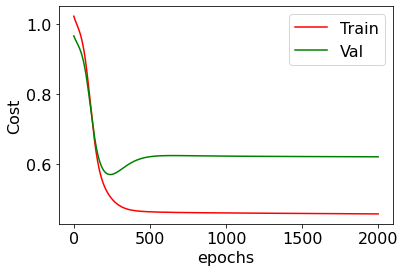

In [74]:
costs = np.squeeze(costs)
plt.plot(costs, color='red')
plt.plot(costs_val, color='green')

plt.ylabel('Cost', size=16)
plt.xlabel('epochs', size=16)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<font size=4>
    
 ## Precision:

Para calcular la precision del modelo se usa el error cuadrático medio, MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i=1}^{m_{test}} (y_{i}-a_{i})^2)*100$$

In [75]:
predictions_train = predict(opt_parameters, train_x, train_y)

print("train accuracy: {} %".format(100 - np.mean(np.power(predictions_train-train_y, 2)) * 100))


train accuracy: 52.62552965437428 %


In [76]:
predictions_test = predict(opt_parameters, test_x, test_y)

print("test accuracy: {} %".format(100 - np.mean(np.power(predictions_test-test_y, 2)) * 100))


test accuracy: 48.5289782965929 %
